# Ternary Vapor-Liquid Equilibrium: Acetone/Methanol/Chloroform

## Upgrade the Package `chbe444umd`
+ Upgrading will enable you to access its latest capabilities.
+ To install, run:
  >`%pip install chbe444umd`
+ To upgrade, run:
  >`%pip install --upgrade chbe444umd`
+ Restart the kernel after installing or upgrading.

## 1. Specify Ternary System and Perform VLE Calculations

### 1.1 Specify ternary system

In [1]:
import chbe444umd as des

%config InlineBackend.figure_format='svg'
%matplotlib inline

sysACM = des.TernarySystem(  # acetone/methanol/chloroform (non-ideal)
    component_ids={'acetone', 'methanol', 'chloroform'},
    component_names={'acetone', 'methanol', 'chloroform'},
    axes={'acetone': 0, 'methanol': 1},
    Antoine={'acetone':    {'A': 4.4245, 'B': 1312.3, 'C': -32.445},
             'methanol':   {'A': 5.2041, 'B': 1581.3, 'C': -33.5},
             'chloroform': {'A': 4.2077, 'B': 1233.1, 'C': -40.9530}},
    Wilson_a={'acetone':    {'acetone':  0,        'methanol':  0,       'chloroform': -0.7683},
              'methanol':   {'acetone':  0,        'methanol':  0,       'chloroform':  0},
              'chloroform': {'acetone': -0.7191,   'methanol':  0,       'chloroform':  0}},
    Wilson_b={'acetone':    {'acetone':  0,        'methanol': -115.663, 'chloroform':  262.1790},
              'methanol':   {'acetone': -108.5260, 'methanol':  0,       'chloroform': -652.8960},
              'chloroform': {'acetone':  435.1440, 'methanol': -32.5972, 'chloroform':  0}}
)

### 1.2 Plot equilibrium field

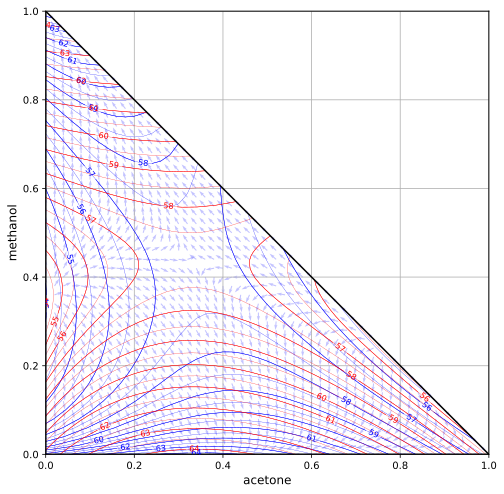

In [2]:
fig, ax, _ = sysACM.simulate_vle_field(
    n_vectors=51, arrow_scale=51,
    Tmin=50, Tmax=70,
    contour_T_heavy=1, contour_T_medium=0.5, contour_T_light=0.1)

# plt.savefig('ACM.svg', format='svg', bbox_inches='tight', pad_inches=0)

### 1.3 Query VLE properties

In [3]:
sysACM.gamma([[0.3, 0.4, 0.3], [0.2, 0.1, 0.7]], [40, 55])

array([[0.87608001, 1.4448496 , 1.10976379],
       [0.59754396, 2.99414671, 1.0008212 ]])

In [4]:
print(sysACM.vle_properties([0.32, 0.4, 0.28]))

Mixture VLE properties:
    Pressure (P, bar): 1.013
    Overall composition (z): [0.32 0.4  0.28]
    If this mixture were a saturated liquid:
        Vapor in equilibrium (yeq): [0.303 0.421 0.276]
        Bubble T (T_bubl, °C): 57.292
    If this mixture were a saturated vapor:
        Liquid in equilibrium (xeq): [0.344 0.36  0.296]
        Dew T (T_dew, °C): 57.367 °C
    Compositions are reported as mole fractions



## 2. Integrate Residue Curves

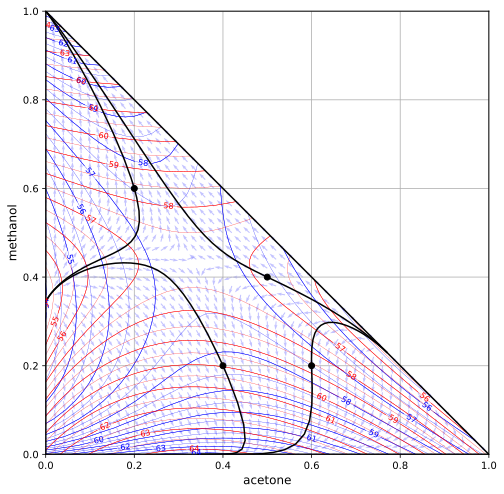

In [5]:
ax, res_fwd, res_bwd = sysACM.integrate_residue(ax, feed={0: {'acetone': 0.4, 'methanol': 0.2, 'chloroform': 0.4},
                                         1: {'acetone': 0.6, 'methanol': 0.2, 'chloroform': 0.2},
                                         2: {'acetone': 0.2, 'methanol': 0.6, 'chloroform': 0.2},
                                         3: {'acetone': 0.5, 'methanol': 0.4, 'chloroform': 0.1}},
                                           integration_time=20, max_step=0.5, show_feed=True,
                                           linestyle='--', color='k', marker='o', markersize=6)
fig

## 3. Analyze Azeotropy

### 3.1 Find stationary points

In [6]:
res = sysACM.find_stationary_points(decimals=2)
print(res)

[0.00, 0.00, 1.00]   61.25 °C  eigenvalues: +0.47  -5.79  (saddle)
[0.00, 0.34, 0.66]   53.97 °C  eigenvalues: +0.63  +0.56  (unstable)
[0.00, 1.00, 0.00]   64.53 °C  eigenvalues: -1.88  -1.44  (stable)
[0.33, 0.44, 0.23]   57.29 °C  eigenvalues: -0.26  +0.49  (saddle)
[0.34, 0.00, 0.66]   64.26 °C  eigenvalues: -0.33  -2.83  (stable)
[0.77, 0.23, 0.00]   55.33 °C  eigenvalues: +0.22  +0.44  (unstable)
[1.00, 0.00, 0.00]   56.27 °C  eigenvalues: +0.55  -0.34  (saddle)



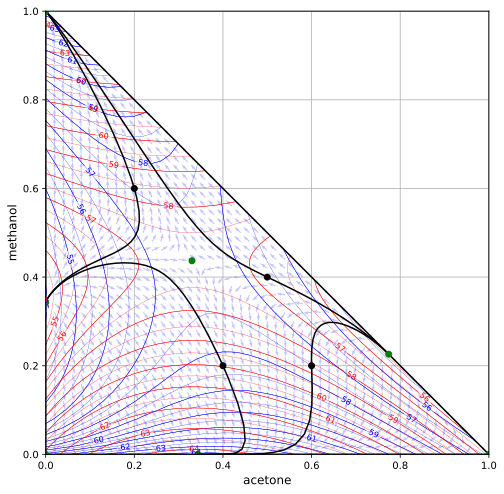

In [7]:
for x in res.x:
    ax.plot(x[0], x[1], 'go')
fig

### 3.2 Plot separatrices

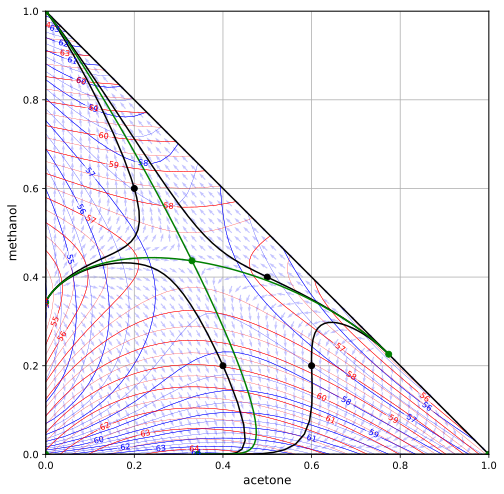

In [8]:
sysACM.plot_separatrices(ax, stationary_points=res, c='g', ls='-')
fig